In [117]:
import scipy.stats as stats 
import pandas as pd
import numpy as np


In [118]:
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics


In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [120]:
df = pd.read_csv('credit_card1.csv')

In [121]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [123]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [125]:
df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1941,1942,43,19,58,95307,2,3.20000,1,0,0,0,0,1,0
1575,1576,50,26,88,90037,1,2.70000,1,0,0,0,0,1,0
2115,2116,57,31,30,95070,3,1.40000,1,0,0,0,0,0,0
3399,3400,54,29,54,94720,2,2.10000,3,97,0,0,0,0,0
2396,2397,34,10,43,95014,1,1.70000,1,142,0,0,0,0,1
3120,3121,35,11,75,94542,2,1.70000,2,0,0,0,0,1,0
212,213,46,22,69,91604,2,1.70000,1,209,0,0,0,0,0
1455,1456,63,39,160,91330,2,2.10000,1,0,0,0,0,0,1
1879,1880,56,30,78,90401,3,1.70000,2,0,0,0,0,0,0
1654,1655,60,34,102,94305,2,2.00000,1,0,0,0,0,1,1


In [128]:
df.drop(['Online'],axis=1,inplace=True) 

# Data Preprocessing 

In [129]:
df.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [131]:
df.ZIPCode.nunique()

467

In [132]:
list_zipcode=df.ZIPCode.unique()

In [133]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [134]:
df['County']=df['ZIPCode'].map(dict_zip)

In [135]:
df.County.nunique()

1

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  CreditCard         5000 non-null   int64  
 12  County             27 non-null     object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [137]:
from matplotlib import pyplot as plt

In [138]:
import seaborn as sns

In [139]:
def dist_box(data):
 
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

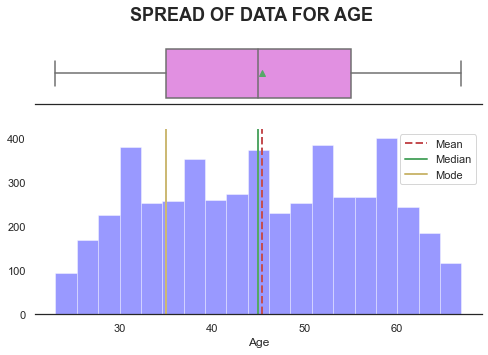

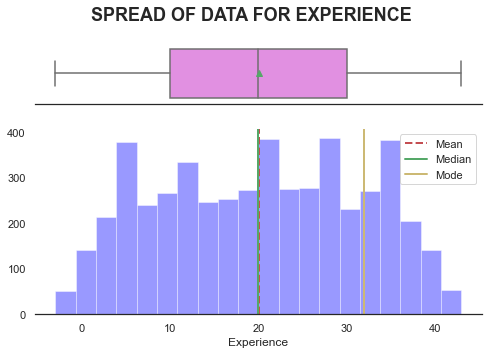

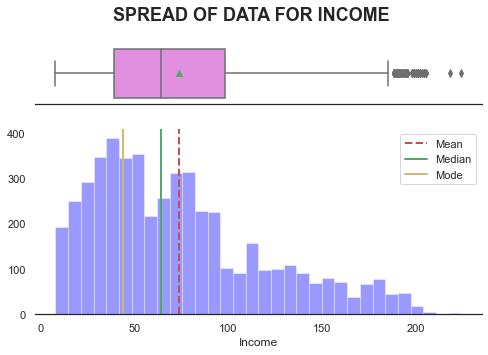

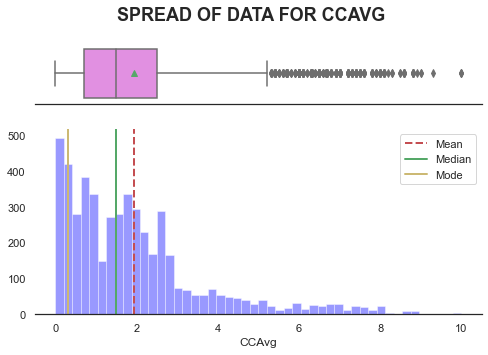

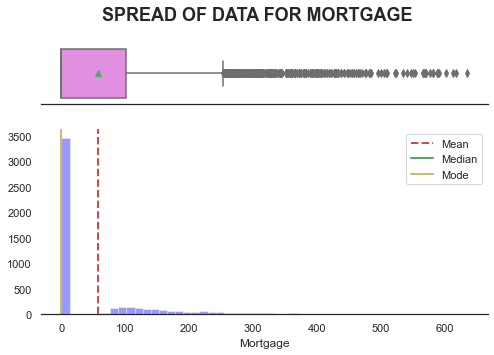

In [140]:
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

In [141]:
df['Agebin'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

In [142]:
df["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

In [143]:
df.CCAvg.describe()

count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

In [144]:
df["Spending_group"] = pd.cut( x=df["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

KeyError: 'Online'

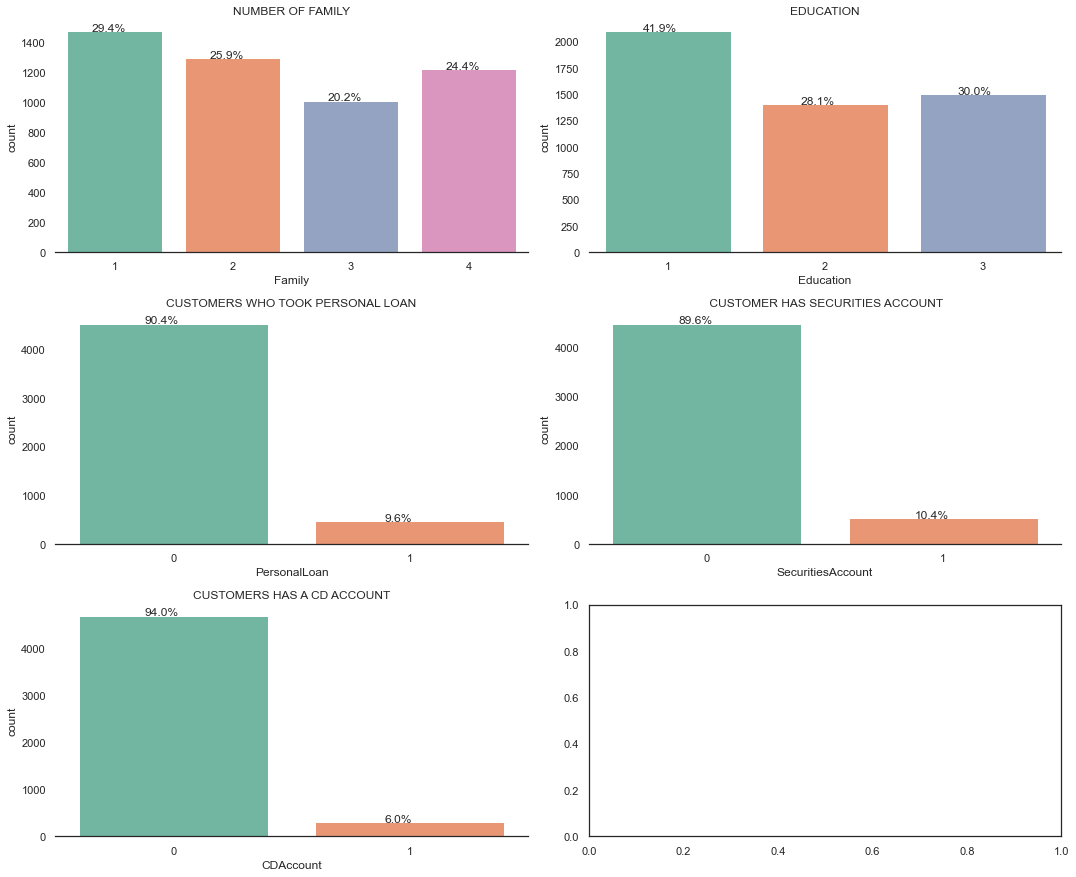

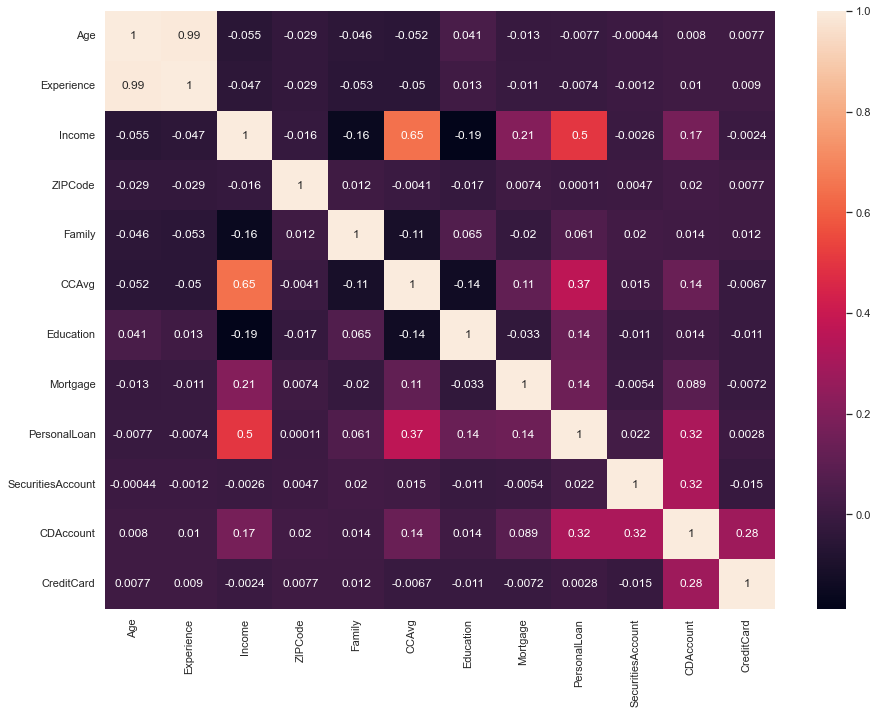

In [160]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

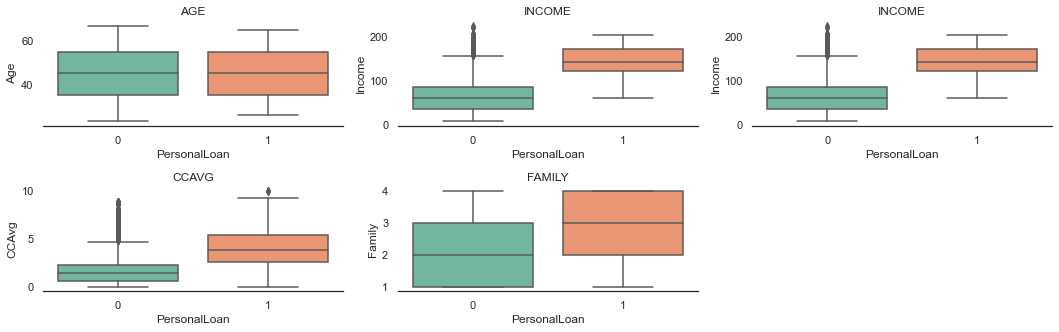

In [161]:
numeric_columns = ['Age','Income','Income','CCAvg','Family']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(11,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) 
        plt.tight_layout()
        plt.title(variable.upper())


# Check Distribution

([<matplotlib.patches.Wedge at 0x1a762a48310>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

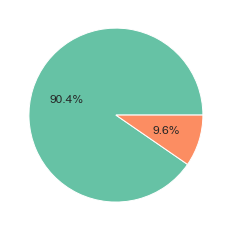

In [148]:
plt.pie(data=df,x=df["PersonalLoan"].value_counts(),autopct='%2.1f%%')

# Logistic Regression

In [149]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 2)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
   

In [150]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list 

In [151]:
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
    
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

In [152]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,CreditCard,County,Agebin,Income_group,Spending_group
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,NaN,18-30,Lower,Medium
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,NaN,41-50,Lower,Medium
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,NaN,31-40,Lower,Medium
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,NaN,31-40,Middle,High
4,35,8,45,91330,4,1.00000,2,0,0,0,0,1,NaN,31-40,Lower,Medium


# Decision Tree

In [153]:
X= df[['Income']]
y=df[['CreditCard']] 

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.04, random_state=0)

In [156]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [110]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))



Train/Test split results:
LogisticRegression accuracy is 0.714
LogisticRegression log_loss is 0.599
LogisticRegression auc is 0.496


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\User\AppData\Local\Temp\ipykernel_12060\2969019931.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
C:\Users\User\AppData\Local\Temp\ipykernel_12060\2969019931.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


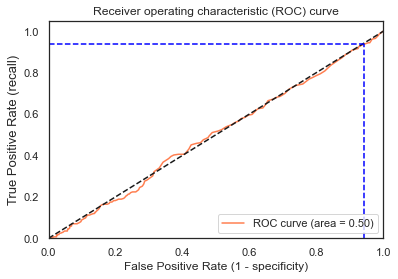

Using a threshold of 0.296 guarantees a sensitivity of 0.937 and a specificity of 0.057, i.e. a false positive rate of 94.26%.


In [112]:
idx = np.min(np.where(tpr > 0.93)) 

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=13)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))